In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import json
import baseline
from baseline import *
from decoder import *
from alphabet import *
from train import *
import torch
from matplotlib import pyplot as plt

torch.__version__

'1.4.0'

In [2]:
LANGUAGE = 'Python'

def filter_ascii(strings):
    'Returns only the strings that can be encoded in ASCII.'
    l = []
    for s in strings:
        try:
            s.encode('ascii')
            l.append(s)
        except UnicodeEncodeError:
            pass
        
    return l

with open('dataset/medium.json') as f:
    multilang_dataset = json.load(f)
    dataset = multilang_dataset[LANGUAGE]
    
    dataset['train'] = filter_ascii(dataset['train'])
    dataset['dev'] = filter_ascii(dataset['dev'])
    dataset['test'] = filter_ascii(dataset['test'])
    
    tiny_dataset = {
        'train': dataset['train'][:50],
        'dev': dataset['train'][:50],
        'test': dataset['train'][:50],
    }
    
    print('{} training examples, {} validation examples, {} test exampless'.format(
        len(dataset['train']), 
        len(dataset['dev']),
        len(dataset['test'])))

79648 training examples, 9943 validation examples, 9963 test exampless


In [3]:
def generate_dumb_dataset():
    'Returns a dataset where all examples are the same string, which consists of 10 times the same letter.'

    SIZE = 200
    l = []

    for i in range(SIZE):
        l.append(random.choice('abcdefghijklmnopqrstuvwxyz') * random.choice([5, 10]))
        
    return {'train': l, 'dev': l, 'test': l}

dumb_dataset = generate_dumb_dataset()

In [4]:
device = torch.device(0) if torch.cuda.is_available() else torch.device('cpu')
print(device)

alphabet = AsciiOneHotEncoding(device)
encoder = baseline.UniformEncoder(0.95)
decoder = AutoCompleteDecoderModel(alphabet, hidden_size=512)

cuda:0


Epoch 0 iteration 0: loss = 4.860, tp = 291.87 lines/s
Epoch 0 iteration 100: loss = 3.030, tp = 401.03 lines/s
Epoch 0 iteration 200: loss = 2.693, tp = 386.16 lines/s
Epoch 0 iteration 300: loss = 2.535, tp = 377.27 lines/s
Epoch 0 iteration 400: loss = 2.385, tp = 377.87 lines/s
Epoch 0 iteration 500: loss = 2.137, tp = 378.07 lines/s
Epoch 0 iteration 600: loss = 2.005, tp = 380.80 lines/s
Epoch 0 iteration 700: loss = 1.957, tp = 376.71 lines/s
Epoch 0 iteration 800: loss = 1.871, tp = 374.79 lines/s
Epoch 0 iteration 900: loss = 1.814, tp = 374.79 lines/s
Epoch 0 iteration 1000: loss = 1.794, tp = 373.20 lines/s
Epoch 0 iteration 1100: loss = 1.766, tp = 373.20 lines/s
Epoch 0 iteration 1200: loss = 1.617, tp = 374.46 lines/s
Epoch 1 iteration 55: loss = 1.707, tp = 377.89 lines/s
Epoch 1 iteration 155: loss = 1.621, tp = 378.68 lines/s
Epoch 1 iteration 255: loss = 1.719, tp = 381.31 lines/s
Epoch 1 iteration 355: loss = 1.664, tp = 381.07 lines/s
Epoch 1 iteration 455: loss = 1

Epoch 12 iteration 160: loss = nan, tp = 386.09 lines/s
Epoch 12 iteration 260: loss = nan, tp = 385.99 lines/s
Epoch 12 iteration 360: loss = nan, tp = 386.00 lines/s
Epoch 12 iteration 460: loss = nan, tp = 386.24 lines/s
Epoch 12 iteration 560: loss = nan, tp = 386.29 lines/s
Epoch 12 iteration 660: loss = nan, tp = 386.40 lines/s
Epoch 12 iteration 760: loss = nan, tp = 386.58 lines/s
Epoch 12 iteration 860: loss = nan, tp = 386.79 lines/s
Epoch 12 iteration 960: loss = nan, tp = 386.94 lines/s
Epoch 12 iteration 1060: loss = nan, tp = 386.95 lines/s
Epoch 12 iteration 1160: loss = nan, tp = 387.04 lines/s
Epoch 13 iteration 15: loss = nan, tp = 387.22 lines/s
Epoch 13 iteration 115: loss = nan, tp = 387.36 lines/s
Epoch 13 iteration 215: loss = nan, tp = 387.38 lines/s
Epoch 13 iteration 315: loss = nan, tp = 387.24 lines/s
Epoch 13 iteration 415: loss = nan, tp = 387.15 lines/s
Epoch 13 iteration 515: loss = nan, tp = 387.21 lines/s
Epoch 13 iteration 615: loss = nan, tp = 387.29

Epoch 23 iteration 1165: loss = nan, tp = 389.52 lines/s
Epoch 24 iteration 20: loss = nan, tp = 389.55 lines/s
Epoch 24 iteration 120: loss = nan, tp = 389.63 lines/s
Epoch 24 iteration 220: loss = nan, tp = 389.50 lines/s
Epoch 24 iteration 320: loss = nan, tp = 389.52 lines/s
Epoch 24 iteration 420: loss = nan, tp = 389.55 lines/s
Epoch 24 iteration 520: loss = nan, tp = 389.53 lines/s
Epoch 24 iteration 620: loss = nan, tp = 389.58 lines/s
Epoch 24 iteration 720: loss = nan, tp = 389.69 lines/s
Epoch 24 iteration 820: loss = nan, tp = 389.63 lines/s
Epoch 24 iteration 920: loss = nan, tp = 389.62 lines/s
Epoch 24 iteration 1020: loss = nan, tp = 389.66 lines/s
Epoch 24 iteration 1120: loss = nan, tp = 389.61 lines/s
Epoch 24 iteration 1220: loss = nan, tp = 389.48 lines/s
Epoch 25 iteration 75: loss = nan, tp = 389.54 lines/s
Epoch 25 iteration 175: loss = nan, tp = 389.59 lines/s
Epoch 25 iteration 275: loss = nan, tp = 389.66 lines/s
Epoch 25 iteration 375: loss = nan, tp = 389.7

Epoch 35 iteration 925: loss = nan, tp = 391.40 lines/s
Epoch 35 iteration 1025: loss = nan, tp = 391.42 lines/s
Epoch 35 iteration 1125: loss = nan, tp = 391.47 lines/s
Epoch 35 iteration 1225: loss = nan, tp = 391.39 lines/s
Epoch 36 iteration 80: loss = nan, tp = 391.47 lines/s
Epoch 36 iteration 180: loss = nan, tp = 391.51 lines/s
Epoch 36 iteration 280: loss = nan, tp = 391.55 lines/s
Epoch 36 iteration 380: loss = nan, tp = 391.55 lines/s
Epoch 36 iteration 480: loss = nan, tp = 391.44 lines/s
Epoch 36 iteration 580: loss = nan, tp = 391.41 lines/s
Epoch 36 iteration 680: loss = nan, tp = 391.45 lines/s
Epoch 36 iteration 780: loss = nan, tp = 391.48 lines/s
Epoch 36 iteration 880: loss = nan, tp = 391.45 lines/s
Epoch 36 iteration 980: loss = nan, tp = 391.48 lines/s
Epoch 36 iteration 1080: loss = nan, tp = 391.52 lines/s
Epoch 36 iteration 1180: loss = nan, tp = 391.60 lines/s
Epoch 37 iteration 35: loss = nan, tp = 391.58 lines/s
Epoch 37 iteration 135: loss = nan, tp = 391.

Epoch 47 iteration 585: loss = nan, tp = 392.09 lines/s
Epoch 47 iteration 685: loss = nan, tp = 392.09 lines/s
Epoch 47 iteration 785: loss = nan, tp = 392.11 lines/s
Epoch 47 iteration 885: loss = nan, tp = 392.09 lines/s
Epoch 47 iteration 985: loss = nan, tp = 392.11 lines/s
Epoch 47 iteration 1085: loss = nan, tp = 392.17 lines/s
Epoch 47 iteration 1185: loss = nan, tp = 392.22 lines/s
Epoch 48 iteration 40: loss = nan, tp = 392.24 lines/s
Epoch 48 iteration 140: loss = nan, tp = 392.28 lines/s
Epoch 48 iteration 240: loss = nan, tp = 392.29 lines/s
Epoch 48 iteration 340: loss = nan, tp = 392.23 lines/s
Epoch 48 iteration 440: loss = nan, tp = 392.18 lines/s
Epoch 48 iteration 540: loss = nan, tp = 392.19 lines/s
Epoch 48 iteration 640: loss = nan, tp = 392.22 lines/s
Epoch 48 iteration 740: loss = nan, tp = 392.22 lines/s
Epoch 48 iteration 840: loss = nan, tp = 392.19 lines/s
Epoch 48 iteration 940: loss = nan, tp = 392.15 lines/s
Epoch 48 iteration 1040: loss = nan, tp = 392.1

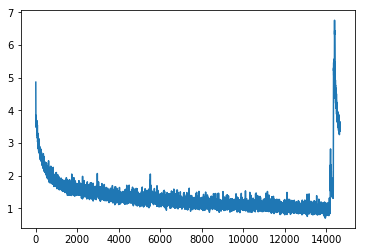

In [6]:
parameters = {
    'learning_rate': 5e-3,
    'verbose': True,
    'batch_size': 64,
    'init_scale': 0.1,
    'epochs': 50,
}

train_loss_history = train(encoder, decoder, dataset, parameters, device)
plt.plot(train_loss_history)

# End-to-end samples

In [7]:
SPLIT = 'train'

import copy

s = random.choice(dataset[SPLIT])
compressed = encoder.encode(s)
decompressed = decoder([compressed])

print('String:', repr(s))
print('Encoded:', repr(compressed))
print('Decoded:', repr(decompressed[0]))

String: 'process_file(f)'
Encoded: 'process_file(f)'
Decoded: '\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
